# Importing modules

In [1]:
import pandas as pd
import numpy as np

# Importing Data

In [2]:
file1 = pd.read_csv("Data/file1.csv")
file2 = pd.read_csv("Data/file2.csv")
file3 = pd.read_csv("Data/file3.csv")

# Checking the imported data

First let's check if the shape of the 3 files is compatible.

In [3]:
print(f'The shape of file1 is {file1.shape}')
print(f'The shape of file2 is {file2.shape}')
print(f'The shape of file3 is {file3.shape}')


The shape of file1 is (4008, 11)
The shape of file2 is (996, 11)
The shape of file3 is (7070, 11)


They are. Now let's check if the headings are the same in order to avoid generating extra columns.

In [4]:
print(set(file1.columns) ^ set(file2.columns))
print(set(file1.columns) ^ set(file3.columns))
print(set(file2.columns) ^ set(file3.columns))

set()
{'GENDER', 'State', 'Gender', 'ST'}
{'GENDER', 'State', 'Gender', 'ST'}


Before concatenaiting the data I will change the heading of file3 to be the same as in file1 and 2

In [5]:
file3.rename(columns={"State":"ST", "Gender": "GENDER"}, inplace=True)

ca_df = pd.concat([file1,file2,file3]).reset_index(drop=True)

Let's check everything looks right in terms of importing.

In [6]:
ca_df

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


# Standardizing Headings

The headings are standarized using a function.

In [7]:
def stdrz_headings(heading):
    """
    Returns a Pandas Index object containing a standarized heading, i.e lower case and " " replaced by "_"
    
    Parameters
    ----------
    columns_list : iterable
        The df heading.

    Returns
    -------
    Pandas Index Object containing the standarized heading

    """  
    return [clabel.lower().replace(" ", "_") for clabel in heading]


ca_df.columns = stdrz_headings(ca_df.columns)   


# Deleting and rearranging columns

We drop the column customer, as we dont need it for our analysis.

In [8]:
ca_df.drop(columns="customer", inplace=True)

Let's check how the data looks up to now.

In [9]:
ca_df.head()

,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


# Correcting data types

First let's show the datatypes we have in our dataframe.

In [10]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer_lifetime_value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly_premium_auto       9137 non-null   float64
 6   number_of_open_complaints  9137 non-null   object 
 7   policy_type                9137 non-null   object 
 8   vehicle_class              9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 943.4+ KB


Customer_lifetime_value and number_of_open_complaints should be numeric. Let's take a deeper look into these two.

In [11]:
print(set([type(item) for item in ca_df.customer_lifetime_value]))
print(set([type(item) for item in ca_df.number_of_open_complaints]))


{<class 'float'>, <class 'str'>}
{<class 'int'>, <class 'float'>, <class 'str'>}


We need to convert into float/integer the strings. In addition:

- Customer_lifetime_value: some of the data ends with symbol %
- number_of_open_complaints: some of the data is presented in the form n1/n2/n3. Analyzing it we can figure out that the number of complaints is actually n2 (n1 seems to be a control number taking only values 0 or 1 and n3 is always 0)

The option of mapping a function in the corresponding data series has been explored below. I will use a lambda function instead of a dedicated function because the purpose of the function is very specific and it will unlikely to be reused.

In [12]:
# QUESTIONs 
# I tried to use here method chaining but I had problems because pd.str only works with series with all items = str. Is there a work around to this?
# In column customer life time value, do we need to multiply by 100 the items with a %? or all the items in the columns?

(ca_df
.customer_lifetime_value
.str
.strip("%")
.astype("float")*100
)

0                NaN
1         69795359.0
2        128874317.0
3         76458618.0
4         53630765.0
            ...     
12069            NaN
12070            NaN
12071            NaN
12072            NaN
12073            NaN
Name: customer_lifetime_value, Length: 12074, dtype: float64

In [13]:
#If the value is a string
## strip the symbol %, convert into float and round to 0 decimals
## Else check if the valu is Nan
### if yes return value
### if not round to 0 decimals

ca_df.customer_lifetime_value = ca_df.customer_lifetime_value.apply(lambda x: np.round(float(x.strip("%"))*100) if type(x)==str else np.round(x) if x==x else x)

In [14]:
# If the value is a string of the form n/n/n
## Split it into a list, convert it into array of int and apply sum()
## Else return the value

ca_df.number_of_open_complaints = ca_df.number_of_open_complaints.apply(lambda x: np.array(x.split("/"), dtype=int)[1] if type(x)==str else x)

Let us see the result.

In [15]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer_lifetime_value    9130 non-null   float64
 4   income                     9137 non-null   float64
 5   monthly_premium_auto       9137 non-null   float64
 6   number_of_open_complaints  9137 non-null   float64
 7   policy_type                9137 non-null   object 
 8   vehicle_class              9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
dtypes: float64(5), object(5)
memory usage: 943.4+ KB


# Filtering data and Correcting typos

Columns gender and st have obvious problems that need to be cleaned.

In [16]:
print(ca_df.gender.value_counts(dropna=False))
print()
print(ca_df.st.value_counts(dropna=False))

F         4560
M         4368
NaN       3059
Male        40
female      30
Femal       17
Name: gender, dtype: int64

California    3032
NaN           2937
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64


- column st: we will reduce the data to the following unique values [Washington, California, Arizona, Oregon, Nevada]
- column gender: we will reduce the data to the following unique values [M, F]

For this we create a clean_series() function and a clean_one_series() helper function. I decided to use generic functions here because I think they could be used in the future for other projects. The version with a dedicated functions is in a commented cell at the end of this section.

In [17]:
# QUESTION
# I have a helper function with 2 arguments (one always the same, a dictionary). How I pass to the map in the main function a function with two arguments?
# How I define the helper function seems clunky (I need to define cleaning_dict before defining the function). Is there a better way?

In [18]:
cleaning_dict = {"female": "F", "Femal":"F", "Male": "M", "Cali": "California", "AZ":"Arizona", "WA": "Washington"}

In [19]:

def clean_series(df, columns_list, cleaning_dict):
    """
    Modifies in place the target columns of a dataframe, reducing their redundant values into unique values following the pairs {redundant_value : unique_value} provided in the cleaning_dictionary.
    
    
    Parameters
    ----------
    df : Pandas Dataframe
        The data frame to be cleaned
    columns_list : List
        A list of strings with the labels of the target columns
    cleaning_dict : Dictionary
        A dictionary of the form {redundant_value : unique_value}

    Returns
    -------
    None.

    The function modifies inplace the provided df with the new cleaned values.

    """
    for column in columns_list:

        df[column] = list(map(clean_one_serie, df[column]))


def clean_one_serie(item, cleaning_dict = cleaning_dict):

    try:

        return cleaning_dict[item]

    except:

        return item


In [20]:

clean_series(ca_df, ["st", "gender"], cleaning_dict)

In [21]:
print(ca_df.gender.value_counts(dropna=False))
print()
print(ca_df.st.value_counts(dropna=False))

F      4607
M      4408
NaN    3059
Name: gender, dtype: int64

California    3152
NaN           2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: st, dtype: int64


In [22]:
# Cleaning of the column state. First we Define function clean_state() and then we map it to the column

# def clean_state(x):

    # return "California" if x=="Cali" else "Arizona" if x=="AZ" else "Washington" if x=="WA" else x

# map it to column ca_df.state
# ca_df.state = list(map(clean_state, ca_df.state))


In [23]:
# Cleaning of column gender, this time with map and a lambda function
# ca_df.gender = list(map(lambda x: "F" if x in ["female", "Femal"] else "M" if x=="Male" else x, ca_df.gender))

# Removing Duplicates

Here we remove duplicate row.
There were (12074 - 8876) = 3198 duplicated rows

In [24]:
ca_df.drop_duplicates(inplace=True)
ca_df

,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,69795359.0,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,128874317.0,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,76458618.0,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,53630765.0,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23406.0,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3097.0,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8164.0,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.0,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [25]:
print(ca_df.gender.value_counts(dropna=False))
print()
print(ca_df.st.value_counts(dropna=False))

F      4479
M      4274
NaN     123
Name: gender, dtype: int64

California    3039
Oregon        2512
Arizona       1665
Nevada         867
Washington     792
NaN              1
Name: st, dtype: int64


# Replacing null values


## Numeric Columns

For the numeric values we will replace nan values with the mean. The following functions have been created:

- replace_by_mean()
- nan_counter() -only for checking purposes-



In [26]:
# Function to calculate the mean of a column and replace the Nan values with it

def replace_by_mean(df, columns_list):
    """
    Modifies in place the target columns of a dataframe, replacing their Nan values by the column mean.
    
    Parameters
    ----------
    df : Pandas dataframe
        The data frame to be cleaned
    columns_list : List
        A list of strings with the labels of the target columns

    Returns
    -------
    None.

    The function modifies inplace the provided df.

    """

    for column in columns_list:

        mean = np.mean(df[column])
        df[column] = df[column].fillna(mean)

# Function to store in dictionary the number of nan values per column

def nan_counter(df):
    
    """
    Returns a dictionary containing the number of nan values per column (for dataframe df)

    Parameters
    ----------
    df : Pandas dataframe

    Returns
    -------
    remaining_nan : Dictionary
        Contains the number of nan values in each column of the dataframe

    """
    
    remaining_nan = {}

    for column in df.columns:

        remaining_nan[column] = df[column][df[column].isna() == True].size

    return remaining_nan


columns_list = ["customer_lifetime_value", "income", "monthly_premium_auto", "number_of_open_complaints", "total_claim_amount"]

# nan values in numeric columns replaced by the mean in numeric columns
replace_by_mean(ca_df, columns_list)
print(nan_counter(ca_df))

{'st': 1, 'gender': 123, 'education': 1, 'customer_lifetime_value': 0, 'income': 0, 'monthly_premium_auto': 0, 'number_of_open_complaints': 0, 'policy_type': 1, 'vehicle_class': 1, 'total_claim_amount': 0}


Now that we don't have Nan values we can convert floats to integer if appropiate. In this case all the numeric columns can be converted to int without losing significant precision. Again we define a function for this.

In [27]:
def float_to_int(df, columns_list):
    """
    Modifies in place the target columns of a dataframe, converting float values into int.
    
    Parameters
    ----------
    df : Pandas Dataframe
        
    columns_list : List
        A list of strings with the labels of the target columns

    Returns
    -------
    None.

    The function modifies inplace the provided df.

    """

    for column in columns_list:

        df[column] = list(map(lambda x: int(round(x)), df[column]))   

In [28]:
float_to_int(ca_df, columns_list)
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   st                         8875 non-null   object
 1   gender                     8753 non-null   object
 2   education                  8875 non-null   object
 3   customer_lifetime_value    8876 non-null   int64 
 4   income                     8876 non-null   int64 
 5   monthly_premium_auto       8876 non-null   int64 
 6   number_of_open_complaints  8876 non-null   int64 
 7   policy_type                8875 non-null   object
 8   vehicle_class              8875 non-null   object
 9   total_claim_amount         8876 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 762.8+ KB


### What about the income column?

The income columns has more than 2,000 values=0. Does that make sense?

In [29]:
ca_df.income[ca_df.income == 0].size

2256

It coluld make sense. It is young people that doesn´t have a job yet. The insurance is paid by the parents.

In [30]:
ca_df.education.value_counts()

Bachelor                2652
College                 2593
High School or Below    2549
Master                   727
Doctor                   330
Bachelors                 24
Name: education, dtype: int64

561 people with education = Doctor have income = 0. The total of people with Doctor education is 3630. The result is not conclusive, still not sure if the zeros are intended or if it is missing data.

For the purpose of this study I will assume that the 0 values are intended.

In [31]:
print(ca_df[(ca_df.income == 0) & (ca_df.education == "Doctor")].size)
print(ca_df[(ca_df.education == "Doctor")].size)

510
3300


## Categorical columns

Nan value rows dropped in those column with only one occurrence. In the gender column Nan values replace by "U" (for Unknown).

In [32]:
print(nan_counter(ca_df))

{'st': 1, 'gender': 123, 'education': 1, 'customer_lifetime_value': 0, 'income': 0, 'monthly_premium_auto': 0, 'number_of_open_complaints': 0, 'policy_type': 1, 'vehicle_class': 1, 'total_claim_amount': 0}


In [33]:
ca_df.gender = list(map(lambda x: "U" if x != x else x, ca_df.gender))
ca_df.dropna(inplace=True)

In [34]:
print(nan_counter(ca_df))

{'st': 0, 'gender': 0, 'education': 0, 'customer_lifetime_value': 0, 'income': 0, 'monthly_premium_auto': 0, 'number_of_open_complaints': 0, 'policy_type': 0, 'vehicle_class': 0, 'total_claim_amount': 0}


Let us see how the data looks now.

In [35]:
ca_df

,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,U,Master,17946226,0,1000,0,Personal Auto,Four-Door Car,3
1,Arizona,F,Bachelor,69795359,0,94,0,Personal Auto,Four-Door Car,1131
2,Nevada,F,Bachelor,128874317,48767,108,0,Personal Auto,Two-Door Car,566
3,California,M,Bachelor,76458618,0,106,0,Corporate Auto,SUV,530
4,Washington,M,High School or Below,53630765,36357,68,0,Personal Auto,Four-Door Car,17
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23406,71941,73,0,Personal Auto,Four-Door Car,198
12070,California,F,College,3097,21604,79,0,Corporate Auto,Four-Door Car,379
12071,California,M,Bachelor,8164,0,85,3,Corporate Auto,Four-Door Car,791
12072,California,M,College,7524,21941,96,0,Personal Auto,Four-Door Car,691


# Bucketing the data

In [36]:
ca_df.insert(1, "region", list(map(lambda x: "west" if x=="California" else "east" if x=="Washington" else "north west" if x=="Oregon" else "central", ca_df.st)))





In [ ]:
# QUESTION
# How can I map a function to a 2D array? Here I used a nested map but I'm wondering is a "pythonic" way of doing this

# Standardizing the data

In [37]:
ca_df_standarized = pd.DataFrame(list(map(lambda x: list(map(lambda y: y.lower() if type(y)==str else y, x)), ca_df.values)))
ca_df_standarized.columns = ca_df.columns



In [38]:
ca_df_standarized

,st,region,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,washington,east,u,master,17946226,0,1000,0,personal auto,four-door car,3
1,arizona,central,f,bachelor,69795359,0,94,0,personal auto,four-door car,1131
2,nevada,central,f,bachelor,128874317,48767,108,0,personal auto,two-door car,566
3,california,west,m,bachelor,76458618,0,106,0,corporate auto,suv,530
4,washington,east,m,high school or below,53630765,36357,68,0,personal auto,four-door car,17
...,...,...,...,...,...,...,...,...,...,...,...
8870,california,west,m,bachelor,23406,71941,73,0,personal auto,four-door car,198
8871,california,west,f,college,3097,21604,79,0,corporate auto,four-door car,379
8872,california,west,m,bachelor,8164,0,85,3,corporate auto,four-door car,791
8873,california,west,m,college,7524,21941,96,0,personal auto,four-door car,691


# Getting numerical columns

In [39]:
ca_df_standarized._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,17946226,0,1000,0,3
1,69795359,0,94,0,1131
2,128874317,48767,108,0,566
3,76458618,0,106,0,530
4,53630765,36357,68,0,17
...,...,...,...,...,...
8870,23406,71941,73,0,198
8871,3097,21604,79,0,379
8872,8164,0,85,3,791
8873,7524,21941,96,0,691


# Getting categorical columns

In [40]:
ca_df_standarized.select_dtypes("object")

,st,region,gender,education,policy_type,vehicle_class
0,washington,east,u,master,personal auto,four-door car
1,arizona,central,f,bachelor,personal auto,four-door car
2,nevada,central,f,bachelor,personal auto,two-door car
3,california,west,m,bachelor,corporate auto,suv
4,washington,east,m,high school or below,personal auto,four-door car
...,...,...,...,...,...,...
8870,california,west,m,bachelor,personal auto,four-door car
8871,california,west,f,college,corporate auto,four-door car
8872,california,west,m,bachelor,corporate auto,four-door car
8873,california,west,m,college,personal auto,four-door car


# Ploting

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First we import the csv file with all the data (provided on Wednesday)

In [42]:
ca_c_df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")
ca_c_df = ca_c_df.drop('Unnamed: 0', axis=1)

In [43]:
ca_c_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Plot of the total number of responses

We create a new variable with the categories in Respone column [Yes, No]. But first we do a quick cleaning.

In [44]:
ca_c_df.Response = list(map(lambda x: "Not Defined" if x != x else x, ca_c_df.Response))

In [45]:
response = ca_c_df.Response.value_counts(dropna=False)
response

No             8813
Yes            1466
Not Defined     631
Name: Response, dtype: int64

Following code plots and shows the total response as a bar plot.

<BarContainer object of 3 artists>

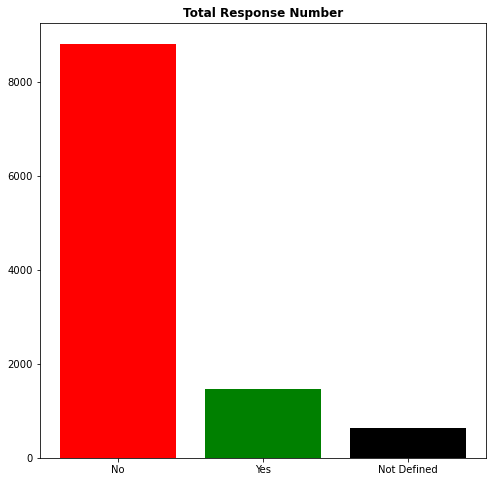

In [46]:
# create figure and axes
fig1, ax1 = plt.subplots(figsize = (8,8))

# set title
ax1.set_title('Total Response Number', fontweight='bold')

# plot the bar chart
ax1.bar(response.index, response, color=('red','green', 'black'))

## Plot of the response rate by the sales channel.

First we will define a function to create a Series containing the response rate for each group

In [47]:
def variable_rate_vs(df, variable, grouper):

    # Dictionary to store the results
    rate_dict = {}
    
    # Series and group seting, they will be used later in the for loop for indexing and accessing the data
    var_cats = df[variable].value_counts()
    group_cats = df[grouper].value_counts()
    group = df.groupby([grouper, variable])[variable].count()
    
    # The outer for loops through the groups
    ## The inner for loops the group series and for the specific group access the variable catergories and stores it in a list
    ## At the end of the innerr loop the rate for the group is stored in a dict of the form {group:rate}
    
    for g in group_cats.index:

        store = []

        for c in var_cats.index:
        
            n = group.loc[(g, c)]
            store.append(n)

        rate_dict[g] = round((store[1] / (store[0] + store[2]))*100, 2)

    # A series is returned
    return pd.Series(rate_dict)

In [48]:
response_channel_rate = variable_rate_vs(ca_c_df, "Response", "Sales Channel")

<BarContainer object of 4 artists>

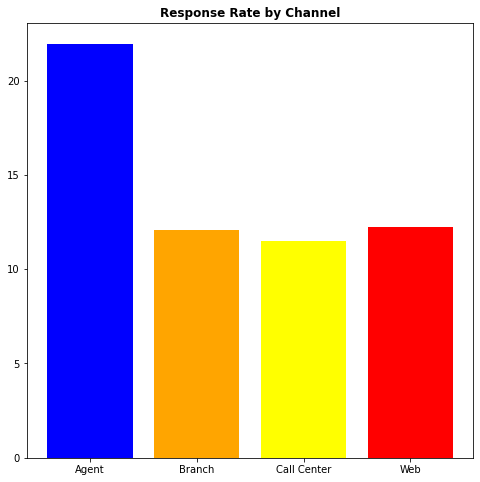

In [49]:
# create figure and axes
fig2, ax2 = plt.subplots(figsize = (8,8))

# set title
ax2.set_title('Response Rate by Channel', fontweight='bold')

# plot the bar chart
ax2.bar(response_channel_rate.index, response_channel_rate, color=('blue','orange', 'yellow', "red"))

Following code plots and shows the total response as a bar plot.

## Plot of the response rate by the Total Claim Amount.

First I will bin the Total Claim Amount into categories.

In [50]:
total_claim_amount_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
ca_c_df['Total_Claim_Amount_binned'] = pd.cut(ca_c_df['Total Claim Amount'],5, labels=total_claim_amount_labels)

In [51]:
ca_c_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Total_Claim_Amount_binned
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Very Low
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Low
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Very Low
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Very Low
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Low


Then fuction variable_rate_vs() can be used.

In [52]:
response_total_claim_amount_rate = variable_rate_vs(ca_c_df, "Response", "Total_Claim_Amount_binned")


In [53]:
response_total_claim_amount_rate

Very Low     16.24
Low          12.76
Moderate     17.41
High          0.00
Very High     0.00
dtype: float64

Following code plots and shows the total response as a bar plot.

<BarContainer object of 5 artists>

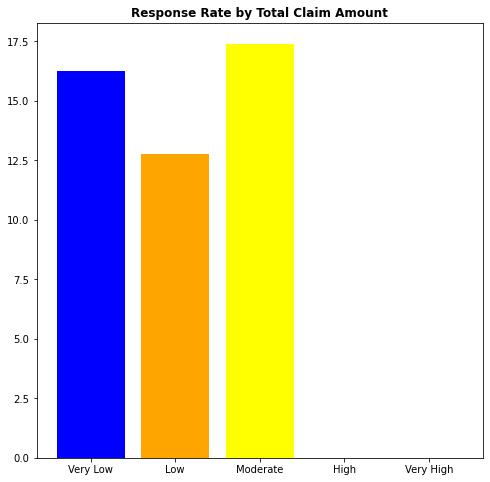

In [54]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (8,8))

# set title
ax3.set_title('Response Rate by Total Claim Amount', fontweight='bold')

# plot the bar chart
ax3.bar(response_total_claim_amount_rate.index, response_total_claim_amount_rate, color=('blue','orange', 'yellow', "red", "black"))

Let us do some checks.

In [55]:
ca_c_df["Response"][ca_c_df.Total_Claim_Amount_binned == ("High" or "Very High")].value_counts()

No             43
Not Defined     5
Name: Response, dtype: int64

The high and very high claims are not responded, which kind of makes sense.

## Plot of the response rate by income

The approach is very simmilar to that for the income.

In [56]:
income_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
ca_c_df['Income_binned'] = pd.cut(ca_c_df['Income'],5, labels=income_labels)

In [57]:
ca_c_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Total_Claim_Amount_binned,Income_binned
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Very Low,Moderate
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Low,Very Low
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Very Low,Low
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Very Low,Moderate
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Low,Low


In [58]:
response_income_rate = variable_rate_vs(ca_c_df, "Response", "Income_binned")


In [59]:
response_income_rate

Very Low     13.47
Low          20.25
Moderate     13.90
High         17.12
Very High    11.57
dtype: float64

<BarContainer object of 5 artists>

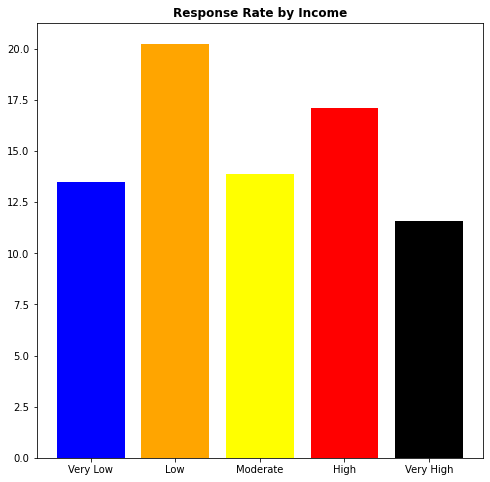

In [60]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (8,8))

# set title
ax3.set_title('Response Rate by Income', fontweight='bold')

# plot the bar chart
ax3.bar(response_income_rate.index, response_income_rate, color=('blue','orange', 'yellow', "red", "black"))

Seems like the income does not correlate with the response rate. Before the analysis I would have assumed that the claims of the High-Very High income clients will be responded more often. 

## Plot the Correlation Heatmap.

We will apply method pd.corr() only to the numerical columns

In [61]:
ca_c_num_df = ca_c_df._get_numeric_data()
correlation_matrix = ca_c_num_df.corr()



In [62]:
correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


We plot the heatmap with seaborn fuction sns.

<AxesSubplot:>

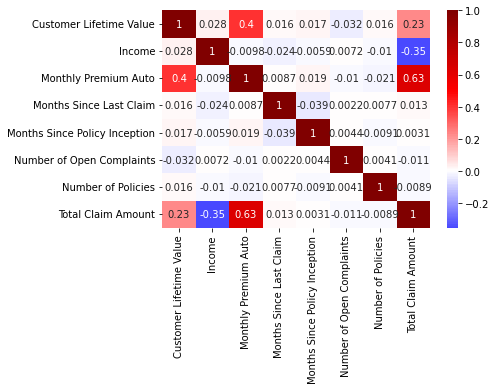

In [64]:
sns.heatmap(correlation_matrix,  # the data for the heatmap
            annot=True,  # show the actual values of correlation
            cmap='seismic',  # provide the 'seismic' colormap
            center=0,  # specify the value at which to center the colormap
           )